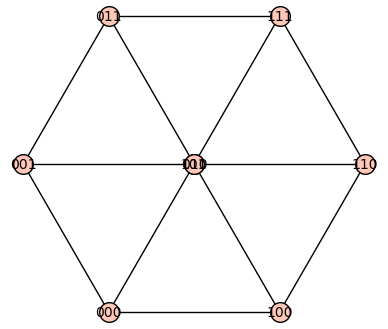

In [65]:
G = graphs.CubeGraph(3)
G.show()

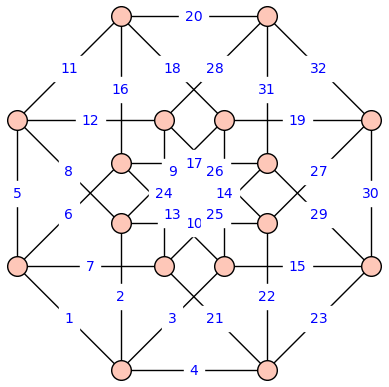

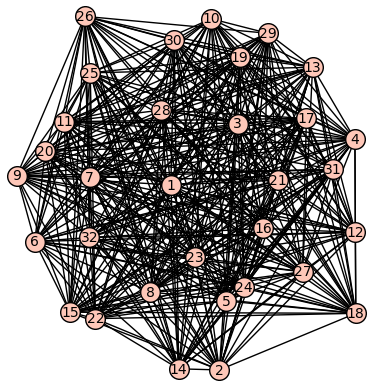

In [66]:
#To plot the cube graph with labeled edges and then compute the 1-skeleton of corresponding matching complex
from sage.graphs.independent_sets import IndependentSets
G = graphs.CubeGraph(4)
i=1
for u,v in G.edge_iterator(labels=None):
    G.set_edge_label(u,v,i)
    i=i+1
G.set_latex_options(scale=3)
G.show(vertex_labels=False, edge_labels=True)
LG=G.line_graph()
#LG.show(vertex_labels=False)
LGc=LG.complement()
LGcv=LG.complement()
#LGc.show(vertex_labels=True)
for v in LGc.vertex_iterator():
    LGcv.relabel({v:v[2]})
LGcv.show()

In [67]:
#The MC variable is the matching complex of graph G.
#MC.faces()
MC=LGcv.clique_complex()

In [68]:
LGcv.vertices()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [69]:
#To compute all the edges adjacent to an edge 'e' in graph G
def adjacent_edges(G, e):
    global b
    E=list()
    for c in G.edges():
        if c[2]==e:
            b=c
    for a in G.edges():
        if a[2] != e:
            if b[0] == a[0] or b[1] == a[0] or b[0] == a[1] or b[1] == a[1]:
                E.append(a[2])
    return E

In [70]:
#Converts a dictionary to a set
def dict_to_set(X):
    SC={}
    for i in X:
        SC = X[i].union(SC)
    return(SC)


In [71]:
#Converts the tuples into frozen set for toggling purpose
def tuples_to_sets(X):
    set_of_sets=set()
    set_of_sets = set(frozenset(i) for i in X)
    return(set_of_sets)

In [72]:
#Converts the tuples into a list
def tuple_to_list(my_tuple):
    my_list=[]
    for i in my_tuple:
        my_list.append(i)
    return(my_list)

In [73]:
#Returns the total number of simplices in X of size greater than a 
def surplus_size(X,a): 
    surplus=list()
    for face in X:
        if len(frozenset(face))> a:
            surplus.append(face)
    return len(surplus)



#Returns all those simplices in X of size greater than a
def surplus_simplices(X,a): 
    surplus=list()
    for face in X:
        if len(frozenset(face))> a:
            surplus.append(face)
    return surplus



#Returns the maximum dimension of any simplex in X
def max_dimension(X): 
    n=0
    for face in X:
        if len(frozenset(face))> n:
            n=len(frozenset(face))
    return n

In [74]:
#Returns the simplices in X of size a 
def simplices_same_dim(X,a): 
    simplices=list()
    for face in X:
        if len(frozenset(face))== a:
            simplices.append(face)
    return simplices

In [75]:
z=len(LG)+1
z

33

In [76]:
#To compute the edges adjacent to every edge in cube complex of dimension 32
L=[None]*z
for i in range (1, z):
    L[i]=adjacent_edges(G,i)
    print("Edges adjacent to the edge", i ,"are: ", L[i])
K=[1,2,3,4]
for i in range (1, z):
    for j in L[i]:
        if j not in K:
            K.append(j)
K

Edges adjacent to the edge 1 are:  [2, 3, 4, 5, 6, 7]
Edges adjacent to the edge 2 are:  [1, 3, 4, 8, 9, 10]
Edges adjacent to the edge 3 are:  [1, 2, 4, 13, 14, 15]
Edges adjacent to the edge 4 are:  [1, 2, 3, 21, 22, 23]
Edges adjacent to the edge 5 are:  [1, 6, 7, 8, 11, 12]
Edges adjacent to the edge 6 are:  [1, 5, 7, 13, 16, 17]
Edges adjacent to the edge 7 are:  [1, 5, 6, 21, 24, 25]
Edges adjacent to the edge 8 are:  [2, 5, 9, 10, 11, 12]
Edges adjacent to the edge 9 are:  [2, 8, 10, 14, 18, 19]
Edges adjacent to the edge 10 are:  [2, 8, 9, 22, 26, 27]
Edges adjacent to the edge 11 are:  [5, 8, 12, 16, 18, 20]
Edges adjacent to the edge 12 are:  [5, 8, 11, 24, 26, 28]
Edges adjacent to the edge 13 are:  [3, 6, 14, 15, 16, 17]
Edges adjacent to the edge 14 are:  [3, 9, 13, 15, 18, 19]
Edges adjacent to the edge 15 are:  [3, 13, 14, 23, 29, 30]
Edges adjacent to the edge 16 are:  [6, 11, 13, 17, 18, 20]
Edges adjacent to the edge 17 are:  [6, 13, 16, 25, 29, 31]
Edges adjacent to 

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 21,
 22,
 23,
 11,
 12,
 16,
 17,
 24,
 25,
 18,
 19,
 26,
 27,
 20,
 28,
 29,
 30,
 31,
 32]

In [77]:
MC_tuples=dict_to_set(MC.faces())
#MC_sets=tuples_to_sets(MC_tuples)

In [78]:
d=int(len(G)/2)+1
set2=set(LGcv.vertices())
print("Dimension of matching complex of G is: ",d-2)
print("Set of all edges is: ", set2)

Dimension of matching complex of G is:  7
Set of all edges is:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}


In [79]:
# Dividing simplices as per their cardinality
ss=[None]*d
for i in range (0,d):
    ss[i]=list()
for face in MC_tuples:
    ss[len(frozenset(face))].append(face)

In [80]:
for i in range (1, d):
    print("Number of simplices of cardinality", i, "are: ", len(ss[i]))

Number of simplices of cardinality 1 are:  32
Number of simplices of cardinality 2 are:  400
Number of simplices of cardinality 3 are:  2496
Number of simplices of cardinality 4 are:  8256
Number of simplices of cardinality 5 are:  14208
Number of simplices of cardinality 6 are:  11648
Number of simplices of cardinality 7 are:  3712
Number of simplices of cardinality 8 are:  272


In [81]:
# To find all maximal simplices of cardinality n
def max_simplices(X,n,set2,L):
    S=list()
    for face in X[n]:
        set1=set()
        set1.update(face)
        for i in face:
            set1.update(L[i])
        if len(set2-set1)==0:
            S.append(face)
    return S


In [82]:
for i in range (1, d):
    print("Number of maximal simplices of cardinality", i, "are:", len(max_simplices(ss,i,set2,L)))

Number of maximal simplices of cardinality 1 are: 0
Number of maximal simplices of cardinality 2 are: 0
Number of maximal simplices of cardinality 3 are: 0
Number of maximal simplices of cardinality 4 are: 0
Number of maximal simplices of cardinality 5 are: 0
Number of maximal simplices of cardinality 6 are: 192
Number of maximal simplices of cardinality 7 are: 1536
Number of maximal simplices of cardinality 8 are: 272


In [83]:
import networkx as nx
H=nx.Graph()
H.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)])
H

AttributeError: module 'networkx' has no attribute 'utils'

In [ ]:
import networkx as nx
cliques = [clique for clique in nx.find_cliques(LGcv) if len(clique) == 11]
print(cliques)